<a href="https://colab.research.google.com/github/Amit32624/ml-basics_by-algorithms/blob/main/LinearRegression_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression using closed form equation

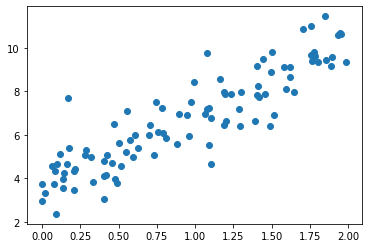

In [20]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X +np.random.randn(100,1)
plt.scatter(X,y)

Performing linear regression through closed form equation

In [23]:
X[0:2]

array([[1.93589987],
       [1.64361853]])

In [24]:
X_b = np.c_[np.ones((100,1)),X]
X_b[0:5]

array([[1.        , 1.93589987],
       [1.        , 1.64361853],
       [1.        , 1.2910471 ],
       [1.        , 1.75663958],
       [1.        , 1.19071977]])

In [25]:
theta_min = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_min

array([[3.63419387],
       [3.25776989]])

In [26]:
# Predictions
X_new = np.array([[0],[2]])
X_new

array([[0],
       [2]])

In [27]:
X_new_b = np.c_[np.ones((2,1)),X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [28]:
y_predict = X_new_b.dot(theta_min)
y_predict

array([[ 3.63419387],
       [10.14973365]])

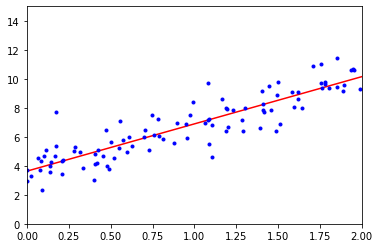

In [30]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

Performing Linear egression through Scikit learn

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.63419387]), array([[3.25776989]]))

In [33]:
lin_reg.predict(X_new)

array([[ 3.63419387],
       [10.14973365]])

In [34]:
np.linalg.pinv(X_b).dot(y)

array([[3.63419387],
       [3.25776989]])

# Batch Gradient Descent

In [35]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [36]:
theta

array([[3.63419387],
       [3.25776989]])

# Stochiastic gradient descent

When using Stochastic Gradient Descent, the training instances must be independent and identically distributed (IID) to ensure that the parameters get pulled toward the global optimum, on average. A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). 

In [37]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters


theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [38]:
theta

array([[3.62988521],
       [3.26211767]])

Linear Regression using Stochastic GD with Scikit-Learn

In [40]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,tol = 1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [41]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.68356429]), array([3.31691355]))

# Mini-batch Gradient Descent

The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

| Algorithm | LargeM |Large N | HyperParameters | Scaling required |Scikit-Learn
| --- | --- | --- | --- | --- | --- |
| Normal Equation | Fast | Slow |0 | No| N/A
|SVD | Fast | Slow |0 | No| LinearRegression
|Batch GD | Slow | Fast |2 | Yes| SGDRegressor
|Stochastic FD| Fast | Fast |>= 2| Yes| SGDRegressor
|Mini-batch GD | Fast | Fast |>=2 | Yes|SGDRegressor
